# Examples
## Freely expanding 1d Gaussian wave packet
Import the pytalises package

In [1]:
import pytalises as pt
import numpy as np
import matplotlib.pyplot as plt

and instantiate a wave function constituent of 128 complex amplitudes that represent the wave function is position space.

(128,)


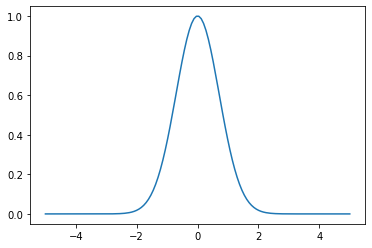

In [2]:
psi = pt.Wavefunction(["exp(-x**2)"], number_of_grid_points=(128,), spatial_ext=[(-5,5)])
print(psi.amp.shape)
plt.plot(psi.r[0], np.abs(psi.amp))

The wave packet can be freely propagated (meaning that $V=0$, or $i\partial_t \psi (r,t)=\frac{\hbar}{2m}\nabla^2 \psi(r,t)$) using the `freely_propagate` function.

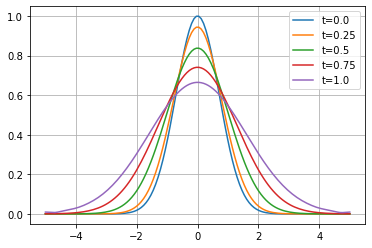

In [3]:
for i in range(5):
    plt.plot(psi.r[0], np.abs(psi.amp), label="t="+str(psi.t))
    pt.freely_propagate(psi, num_time_steps=1, Delta_t=0.25)
plt.legend()
plt.grid()

## Free expansion with initial momentum
The wave funciton is given an initial momentum of $k$ by multiplying it with $\exp (-ikx)$.

In [6]:
psi = pt.Wavefunction(['exp(-(x-x0)**2)*exp(-1j*k*x)'], variables={'x0': -5.0, 'k': 10.0}, number_of_grid_points=(128,), spatial_ext=[(-10,10)])

Additionaly the wave function is offset by $x_0 = -5$.

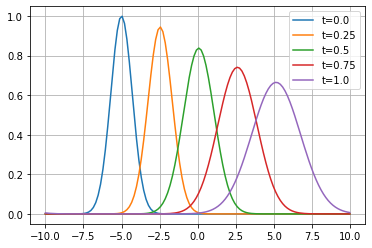

In [7]:
psi = pt.Wavefunction(['exp(-(x-x0)**2)*exp(-1j*k*x)'], variables={'x0': -5.0, 'k': 10.0}, number_of_grid_points=(128,), spatial_ext=[(-10,10)])
for i in range(5):
    plt.plot(psi.r[0], np.abs(psi.amp), label="t="+str(psi.t))
    pt.freely_propagate(psi, num_time_steps=1, Delta_t=0.25)
plt.legend()
plt.grid()

After one time unit, the wave packet traveled 10 position units, as expected with momentum $k=10$.
This unitless represantation is due to the fact that we did not define a mass (optional parameter `m`) for the `Wavefunction` object. In that case the Schrödinger equation simply becomes
$$
i\partial\psi(r,t) = \frac{1}{2}\nabla^2 \psi(r,t)
$$